In [1]:
pwd

'/Users/shivamgautam/Downloads'

In [2]:
import os 
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime as dt
%matplotlib inline

In [3]:
os.chdir('Dataset/')

In [4]:
df_train=pd.read_csv('train.csv')

In [5]:
df_test=pd.read_csv('test.csv')

In [6]:
df_test.shape

(2178, 9)

In [7]:
df_train.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed
0,5/2/2012 19:00,Summer,0,1,Clear + Few clouds,22.14,25.760,77,16.9979
1,9/5/2012 4:00,Fall,0,1,Clear + Few clouds,28.70,33.335,79,19.0012
2,1/13/2011 9:00,Spring,0,1,Clear + Few clouds,5.74,6.060,50,22.0028
3,11/18/2011 16:00,Winter,0,1,Clear + Few clouds,13.94,16.665,29,8.9981
4,9/13/2011 13:00,Fall,0,1,Clear + Few clouds,30.34,33.335,51,19.0012


In [8]:
df_test.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed
0,5/10/2012 11:00,Summer,0,1,Clear + Few clouds,21.32,25.000,48,35.0008
1,6/9/2012 7:00,Summer,0,0,Clear + Few clouds,23.78,27.275,64,7.0015
2,3/6/2011 20:00,Spring,0,0,"Light Snow, Light Rain",11.48,12.120,100,27.9993
3,10/13/2011 11:00,Winter,0,1,Mist + Cloudy,25.42,28.790,83,0.0000
4,6/2/2012 12:00,Summer,0,0,Clear + Few clouds,25.42,31.060,43,23.9994


In [9]:
df_total=df_train.join(pd.read_csv('train_label.csv',header=None),how='inner')
df_total_test=df_test.join(pd.read_csv('train_label.csv',header=None),how='inner')

In [10]:
df_total.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,0
0,5/2/2012 19:00,Summer,0,1,Clear + Few clouds,22.14,25.760,77,16.9979,504
1,9/5/2012 4:00,Fall,0,1,Clear + Few clouds,28.70,33.335,79,19.0012,5
2,1/13/2011 9:00,Spring,0,1,Clear + Few clouds,5.74,6.060,50,22.0028,139
3,11/18/2011 16:00,Winter,0,1,Clear + Few clouds,13.94,16.665,29,8.9981,209
4,9/13/2011 13:00,Fall,0,1,Clear + Few clouds,30.34,33.335,51,19.0012,184


In [11]:
df_total.rename(columns={0:'cab_booked'},inplace=True)

In [12]:
df_total.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,cab_booked
0,5/2/2012 19:00,Summer,0,1,Clear + Few clouds,22.14,25.760,77,16.9979,504
1,9/5/2012 4:00,Fall,0,1,Clear + Few clouds,28.70,33.335,79,19.0012,5
2,1/13/2011 9:00,Spring,0,1,Clear + Few clouds,5.74,6.060,50,22.0028,139
3,11/18/2011 16:00,Winter,0,1,Clear + Few clouds,13.94,16.665,29,8.9981,209
4,9/13/2011 13:00,Fall,0,1,Clear + Few clouds,30.34,33.335,51,19.0012,184


In [13]:
df_total['Month'] = pd.to_datetime(df_total['datetime']).dt.month
df_total['Hrs'] = pd.to_datetime(df_total['datetime']).dt.hour

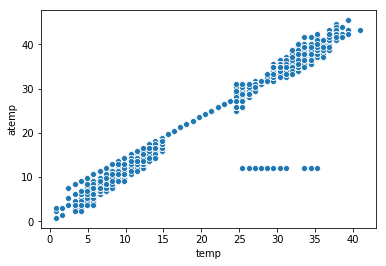

In [14]:
sns.scatterplot(x='temp', y='atemp',data=df_total)

#### Here we can see that there is a linear relation between both temp and atemp variable or feature.


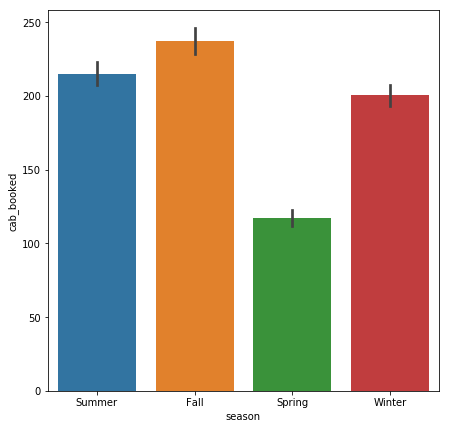

In [15]:
plt.figure(figsize=(7,7))
sns.barplot(x='season',y='cab_booked',data=df_total)


/Users/shivamgautam/anaconda3/lib/python3.6/site-packages/matplotlib/figure.py:459: UserWarning: matplotlib is currently using a non-GUI backend, so cannot show the figure
  "matplotlib is currently using a non-GUI backend, "


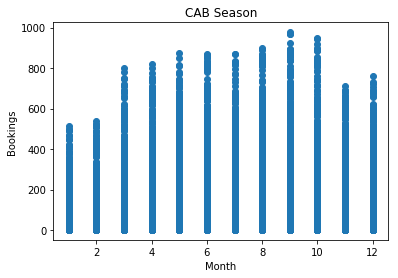

In [16]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots()


ax.scatter(df_total['Month'], df_total['cab_booked'])

ax.set_title('CAB Season')
ax.set_xlabel('Month')
ax.set_ylabel('Bookings')

fig.show()

In [17]:
df_total_test['Month'] = pd.to_datetime(df_total_test['datetime']).dt.month
df_total_test['Hrs'] = pd.to_datetime(df_total_test['datetime']).dt.hour

In [18]:
df_total.groupby(by='season').agg({'cab_booked':'sum'})

,cab_booked
season,
Fall,519548
Spring,249954
Summer,472545
Winter,438658


In [19]:
df_total.groupby(by='season').agg({'humidity':'sum'})

,humidity
season,
Fall,139803
Spring,119556
Summer,133603
Winter,143879


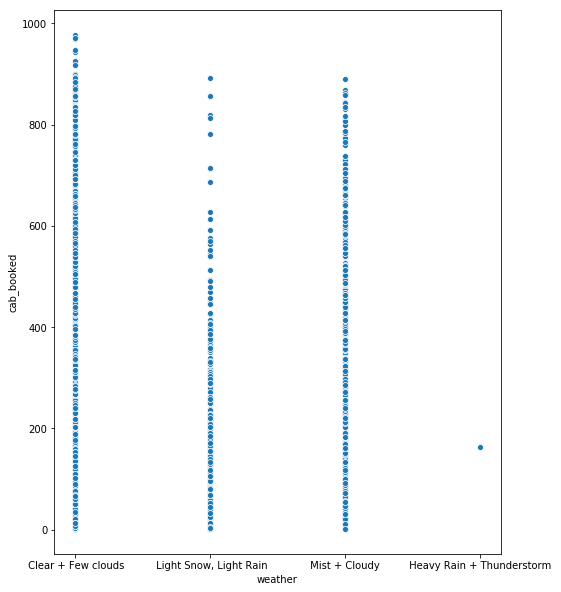

In [20]:
plt.figure(figsize=(8,10))
sns.scatterplot(x='weather',y='cab_booked',data=df_total)

In [24]:
df_total.drop(["datetime"], axis = 1, inplace = True)
df_total_test.drop(["datetime"], axis = 1, inplace = True)



In [21]:
a=pd.to_datetime(df_total.datetime).value_counts()

In [22]:
df_total['date'] = pd.to_datetime(df_total['datetime']).dt.date
df_total['time'] = pd.to_datetime(df_total['datetime']).dt.time
#df_total=df_total.drop(columns=['datetime'])

In [23]:
df_total['Month']=pd.to_datetime(df_total['datetime']).dt.month

In [ ]:
#df_total[['first','last']] = df_total["weather"].str.split("+", n = 1, expand = True)

In [ ]:
#df_total[['first','last']] = df_total["first"].str.split(",", n = 1, expand = True)

In [25]:
df_total.head(9)

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,cab_booked,Month,Hrs,date,time
0,Summer,0,1,Clear + Few clouds,22.14,25.760,77,16.9979,504,5,19,2012-05-02,19:00:00
1,Fall,0,1,Clear + Few clouds,28.70,33.335,79,19.0012,5,9,4,2012-09-05,04:00:00
2,Spring,0,1,Clear + Few clouds,5.74,6.060,50,22.0028,139,1,9,2011-01-13,09:00:00
3,Winter,0,1,Clear + Few clouds,13.94,16.665,29,8.9981,209,11,16,2011-11-18,16:00:00
4,Fall,0,1,Clear + Few clouds,30.34,33.335,51,19.0012,184,9,13,2011-09-13,13:00:00
5,Fall,0,1,Clear + Few clouds,33.62,12.120,36,22.0028,791,8,17,2012-08-17,17:00:00
6,Winter,0,0,Clear + Few clouds,24.60,29.545,73,12.9980,395,10,9,2012-10-06,09:00:00
7,Fall,0,1,Clear + Few clouds,21.32,25.000,68,19.0012,5,9,4,2012-09-10,04:00:00
8,Fall,0,0,"Light Snow, Light Rain",27.06,31.060,61,7.0015,9,7,4,2012-07-14,04:00:00


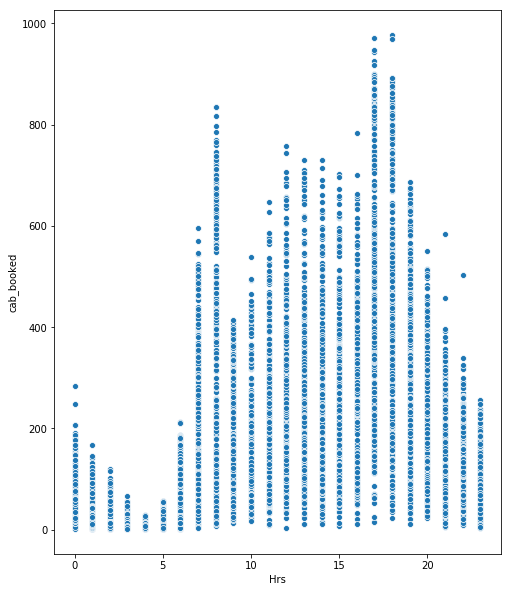

In [28]:
plt.figure(figsize=(8,10))
sns.scatterplot(x='Hrs', y='cab_booked',data=df_total)

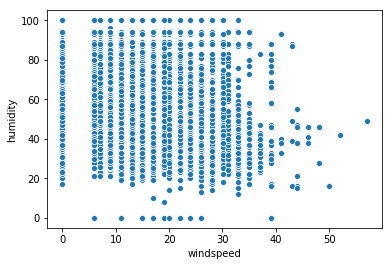

In [44]:
sns.scatterplot(x='windspeed', y='humidity',data=df_total)

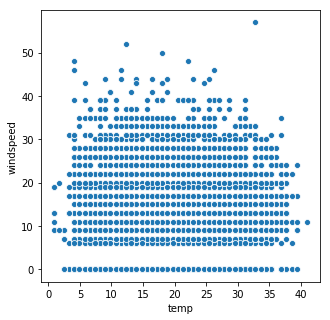

In [45]:
plt.figure(figsize=(5,5))
sns.scatterplot(x='temp',y='windspeed',data=df_total)

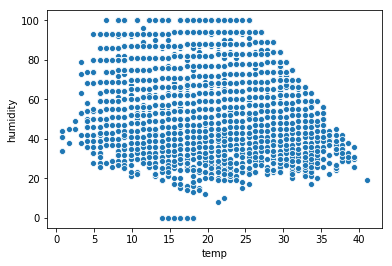

In [46]:
sns.scatterplot(x='temp',y='humidity',data=df_total)

In [47]:
df_total.head()

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,cab_booked,date,time
0,Summer,0,1,Clear + Few clouds,22.14,25.760,77,16.9979,504,2012-05-02,19:00:00
1,Fall,0,1,Clear + Few clouds,28.70,33.335,79,19.0012,5,2012-09-05,04:00:00
2,Spring,0,1,Clear + Few clouds,5.74,6.060,50,22.0028,139,2011-01-13,09:00:00
3,Winter,0,1,Clear + Few clouds,13.94,16.665,29,8.9981,209,2011-11-18,16:00:00
4,Fall,0,1,Clear + Few clouds,30.34,33.335,51,19.0012,184,2011-09-13,13:00:00


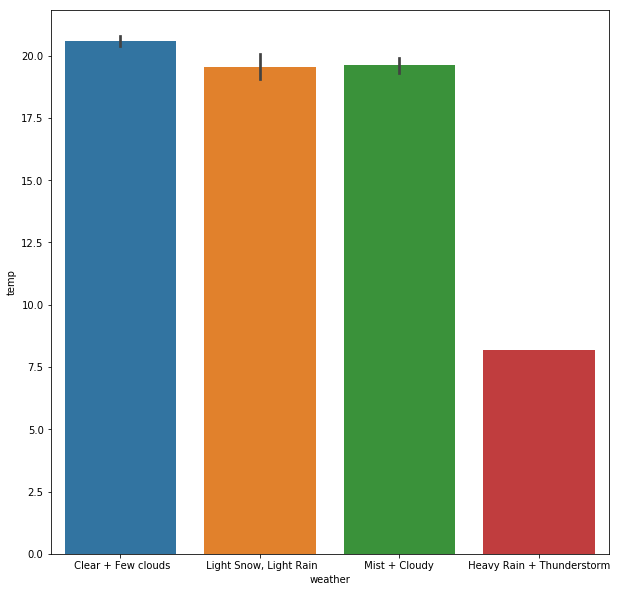

In [48]:
plt.figure(figsize=(10,10))
sns.barplot(x='weather',y='temp',data=df_total)

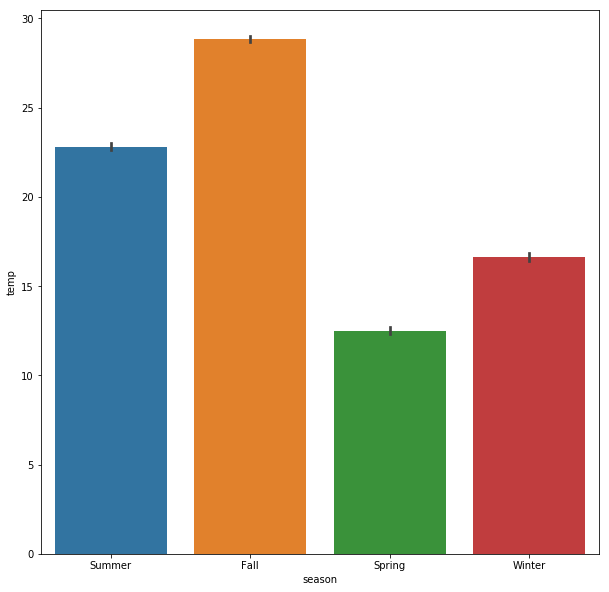

In [49]:
plt.figure(figsize=(10,10))
sns.barplot(x='season',y='temp',data=df_total)

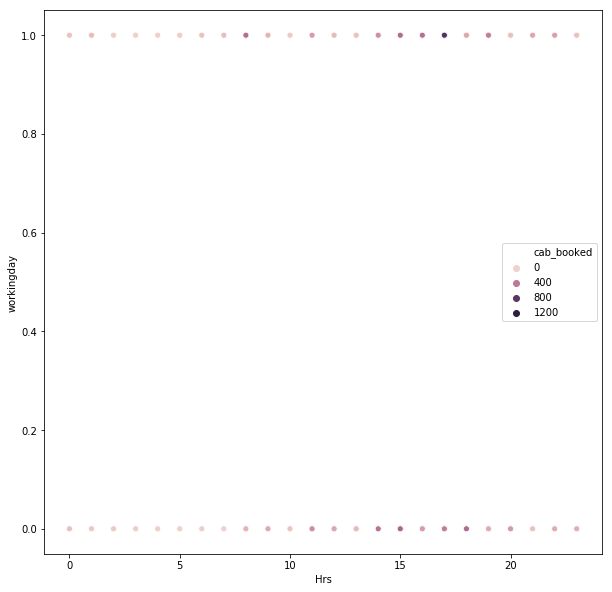

In [39]:
plt.figure(figsize=(10,10))
sns.scatterplot(x='Hrs',y='workingday',data=df_total,hue='cab_booked')

In [65]:
corr=df_total.corr()
corr

,holiday,workingday,temp,atemp,humidity,windspeed,cab_booked,Month,Hrs
holiday,1.000000,-0.249755,-0.000165,-0.005526,-0.004567,0.008075,-0.004391,0.000578,0.003794
workingday,-0.249755,1.000000,0.032189,0.026168,-0.009282,0.013035,0.012285,-0.001437,0.001717
temp,-0.000165,0.032189,1.000000,0.984035,-0.066419,-0.027824,0.397456,0.255916,0.146668
atemp,-0.005526,0.026168,0.984035,1.000000,-0.044206,-0.068911,0.392754,0.263176,0.141578
humidity,-0.004567,-0.009282,-0.066419,-0.044206,1.000000,-0.320346,-0.307982,0.203019,-0.273392
windspeed,0.008075,0.013035,-0.027824,-0.068911,-0.320346,1.000000,0.092090,-0.157710,0.133037
cab_booked,-0.004391,0.012285,0.397456,0.392754,-0.307982,0.092090,1.000000,0.170355,0.399947
Month,0.000578,-0.001437,0.255916,0.263176,0.203019,-0.157710,0.170355,1.000000,-0.006015
Hrs,0.003794,0.001717,0.146668,0.141578,-0.273392,0.133037,0.399947,-0.006015,1.000000


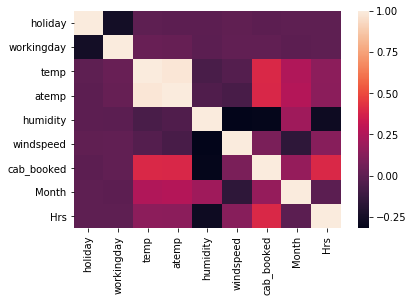

In [63]:
ax=sns.heatmap(corr)

[Text(0.5,0,'holiday'),
 Text(1.5,0,'workingday'),
 Text(2.5,0,'temp'),
 Text(3.5,0,'atemp'),
 Text(4.5,0,'humidity'),
 Text(5.5,0,'windspeed'),
 Text(6.5,0,'cab_booked'),
 Text(7.5,0,'Month'),
 Text(8.5,0,'Hrs')]

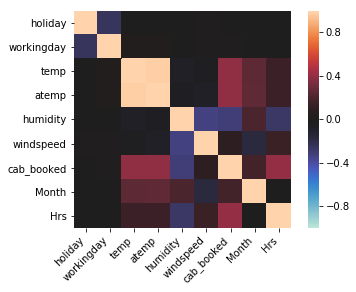

In [73]:
ax=sns.heatmap(corr,vmin=-1,vmax=1,center=0,square=True)
ax.set_xticklabels(
    ax.get_xticklabels(),
    rotation=45,
    horizontalalignment='right')